# Case Study of CBCC (Communities)

In [1]:
import sys
import os

import polars as pl
import pandas as pd
import numpy as np

In [2]:
from matplotlib import pyplot as plt

In [3]:
sys.path.append(f"../../methods")
sys.path.append(f"../")

In [4]:
from cbcc_wrapper import CBCC

In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [6]:
from io_utils import get_accuracy, get_recall

In [7]:
from scenario import create_ai_dataset

## Case 1
face, homo, r=5, AI_acc=mean, num_ai=15, M=4

In [51]:
gt = pd.read_csv("../human_responses/face_gt.csv")
biased_index = gt[gt["gt"]==0]["task"].unique()
gt = gt.set_index("task")

In [52]:
# make the data
human = pd.read_csv("../human_responses/face_r=5.csv")

In [53]:
for run in range(15):
    tmp_df = pd.read_csv(f"../ai_responses/face_r=5_ai=mean_target=1_run={run}.csv")
    if run == 0:
        ai_df = tmp_df
    else:
        ai_df = pd.concat([ai_df, tmp_df], ignore_index=True)

In [54]:
df = pd.concat([human, ai_df], ignore_index=True)

In [55]:
cbcc = CBCC(labels=[0,1,2,3], C=4)

CAUTION: DO NOT EXECUTE THIS PROGRAM DUPULICATELY. 
 BECAUSE IT USES FIXED FILE PATH.


In [56]:
ret = cbcc.fit_predict(df, seed=12347)

C:\Users\Owner\source\repos\collapse\main_experiment\notebooks\../../methods/CBCC/CBCC.exe


In [57]:
acc = get_accuracy(ret, gt)
acc

0.7431506849315068

In [58]:
recall = get_recall(ret, gt, biased_index)
recall

0.0

In [59]:
workers = df["worker"].unique().tolist()

In [60]:
with open("../../methods\CBCC\Results\communities.csv", "r") as f:
    communities_csv = f.read()

In [61]:
prob = {}
worker_index = -1
for line in communities_csv.split("\n")[:-2]:
    if " " in line:
        try:
            values = list(map(float, line.split(" ")[:-1]))
            prob[worker_index] = np.array(values)
        except ValueError as e :
            pass
    else:
        worker_index = int(line)

In [62]:
human_wokers = human["worker"].unique().tolist()

In [63]:
cluster_human_count = np.zeros(4)
cluster_AI_count = np.zeros(4)
for i, w in enumerate(workers):
    if w in human_wokers:
        cluster_human_count[prob[i].argmax()] += 1
    else:
        cluster_AI_count[prob[i].argmax()] += 1

In [64]:
# Community Dist of Humans
cluster_human_count

array([ 0.,  2., 23.,  0.])

In [65]:
# Community Dist of AIs
cluster_AI_count

array([15.,  0.,  0.,  0.])

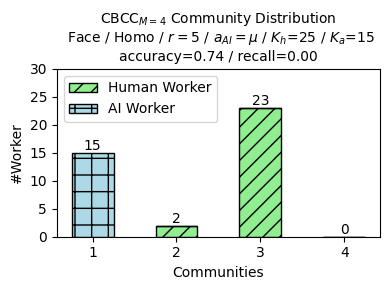

In [66]:
# Visualization
n = 4

if len(cluster_human_count) != n or len(cluster_AI_count) != n:
    raise ValueError("The length of the count arrays must be equal to n.")

clusters = [f'{i+1}' for i in range(n)]
x = np.arange(n)
width = 0.5
fig, ax = plt.subplots(figsize=(4, 3))
bar1 = ax.bar(x, cluster_human_count, width, label='Human Worker', color="lightgreen", hatch="//", edgecolor="black")
bar2 = ax.bar(x, cluster_AI_count, width, bottom=cluster_human_count, label='AI Worker', color="lightblue", hatch="+", edgecolor="black")

ax.set_xlabel('Communities')
ax.set_ylabel('#Worker')
ax.set_title('CBCC$_{M=4}$ Community Distribution \n Face / Homo / $r = 5$ / $a_{AI}=\mu$ / $K_h$=25 / $K_a$=15\n' + f'accuracy={acc:.2f} / recall={recall:.2f}', fontsize=10)
ax.set_xticks(x)
ax.set_xticklabels(clusters)
ax.set_ylim([0,30])
ax.legend()
for i in range(n):
    total_height = cluster_human_count[i] + cluster_AI_count[i]
    ax.text(i, total_height, str(int(total_height)), ha='center', va='bottom')
plt.tight_layout()
plt.savefig('cbcc_community_distribution_1.svg', bbox_inches='tight')

## Case 2
dog, hetero, r=5, AI_acc=mean, num_ai=30, M=8

In [67]:
gt = pd.read_csv("../human_responses/dog_gt.csv")
biased_index = gt[gt["gt"]==0]["task"].unique()
gt = gt.astype(int).set_index("task")

In [68]:
human = pd.read_csv("../human_responses/dog_r=5.csv", dtype={"task":str})

In [69]:
gen = create_ai_dataset("hetero", "dog", r=5, ai_acc="mean", n_classes=4)

In [70]:
for ai_df, num_ai in gen:
    if num_ai == 30:
        break

Loading:  dog_r=5_ai=mean_target=1_run=0.csv
Loading:  dog_r=5_ai=mean_target=2_run=0.csv
Loading:  dog_r=5_ai=mean_target=3_run=0.csv
Loading:  dog_r=5_ai=mean_target=1_run=0.csv
Loading:  dog_r=5_ai=mean_target=2_run=0.csv
Loading:  dog_r=5_ai=mean_target=3_run=0.csv
Loading:  dog_r=5_ai=mean_target=1_run=1.csv
Loading:  dog_r=5_ai=mean_target=2_run=1.csv
Loading:  dog_r=5_ai=mean_target=3_run=1.csv
Loading:  dog_r=5_ai=mean_target=1_run=0.csv
Loading:  dog_r=5_ai=mean_target=2_run=0.csv
Loading:  dog_r=5_ai=mean_target=3_run=0.csv
Loading:  dog_r=5_ai=mean_target=1_run=1.csv
Loading:  dog_r=5_ai=mean_target=2_run=1.csv
Loading:  dog_r=5_ai=mean_target=3_run=1.csv
Loading:  dog_r=5_ai=mean_target=1_run=2.csv
Loading:  dog_r=5_ai=mean_target=2_run=2.csv
Loading:  dog_r=5_ai=mean_target=3_run=2.csv
Loading:  dog_r=5_ai=mean_target=1_run=0.csv
Loading:  dog_r=5_ai=mean_target=2_run=0.csv
Loading:  dog_r=5_ai=mean_target=3_run=0.csv
Loading:  dog_r=5_ai=mean_target=1_run=1.csv
Loading:  

In [71]:
df = pd.concat([human, ai_df], ignore_index=True)

In [72]:
cbcc = CBCC(labels=[0,1,2,3], C=8)

CAUTION: DO NOT EXECUTE THIS PROGRAM DUPULICATELY. 
 BECAUSE IT USES FIXED FILE PATH.


In [73]:
ret = cbcc.fit_predict(df, seed=12347)

C:\Users\Owner\source\repos\collapse\main_experiment\notebooks\../../methods/CBCC/CBCC.exe


In [74]:
ret.index = ret.index.astype(int)

In [75]:
acc = get_accuracy(ret, gt)
acc

0.2701363073110285

In [76]:
recall = get_recall(ret, gt, biased_index.astype(int))
recall

0.0

In [77]:
workers = df["worker"].unique().tolist()

In [78]:
with open("../../methods\CBCC\Results\communities.csv", "r") as f:
    communities_csv = f.read()

In [79]:
prob = {}
worker_index = -1
for line in communities_csv.split("\n")[:-2]:
    if " " in line:
        try:
            values = list(map(float, line.split(" ")[:-1]))
            prob[worker_index] = np.array(values)
        except ValueError as e :
            pass
    else:
        worker_index = int(line)

In [80]:
human_wokers = human["worker"].unique().tolist()

In [81]:
cluster_human_count = np.zeros(8)
cluster_AI_count = np.zeros(8)
for i, w in enumerate(workers):
    if w in human_wokers:
        cluster_human_count[prob[i].argmax()] += 1
    else:
        cluster_AI_count[prob[i].argmax()] += 1

In [82]:
# Community Dist of Humans
cluster_human_count

array([ 0., 88.,  0.,  0.,  4.,  0.,  0.,  7.])

In [83]:
# Community Dist of AIs
cluster_AI_count

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0., 30.])

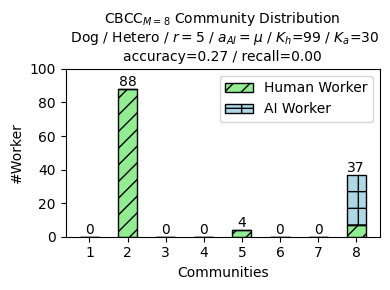

In [84]:
# Visualization
n = 8

if len(cluster_human_count) != n or len(cluster_AI_count) != n:
    raise ValueError("The length of the count arrays must be equal to n.")
clusters = [f'{i+1}' for i in range(n)]
x = np.arange(n)
width = 0.5
fig, ax = plt.subplots(figsize=(4, 3))
bar1 = ax.bar(x, cluster_human_count, width, label='Human Worker', color="lightgreen", hatch="//", edgecolor="black")
bar2 = ax.bar(x, cluster_AI_count, width, bottom=cluster_human_count, label='AI Worker', color="lightblue", hatch="+", edgecolor="black")
ax.set_xlabel('Communities')
ax.set_ylabel('#Worker')
ax.set_title('CBCC$_{M=8}$ Community Distribution \n Dog / Hetero / $r = 5$ / $a_{AI}=\mu$ / $K_h$=99 / $K_a$=30\n' +  f'accuracy={acc:.2f} / recall={recall:.2f}', fontsize=10)
ax.set_xticks(x)
ax.set_xticklabels(clusters)
ax.set_ylim([0,100])
ax.legend()
for i in range(n):
    total_height = cluster_human_count[i] + cluster_AI_count[i]
    ax.text(i, total_height, str(int(total_height)), ha='center', va='bottom')
plt.tight_layout()

plt.savefig('cbcc_community_distribution_2.svg', bbox_inches='tight')